"\np0, p100 = np.percentile(rgb_image, (0, 100))\nrgb_image = np.clip((rgb_image - p0) / (p100 - p0), 0, 1)\nrgb_image = np.flipud(rgb_image)\nrgb_image_8bit = (rgb_image*255).astype(np.uint8)\nrgb_image_bgr = cv.cvtColor(rgb_image_8bit, cv.COLOR_RGB2BGR)\ncv.imwrite('ngc6101.png', rgb_image_bgr)\n"

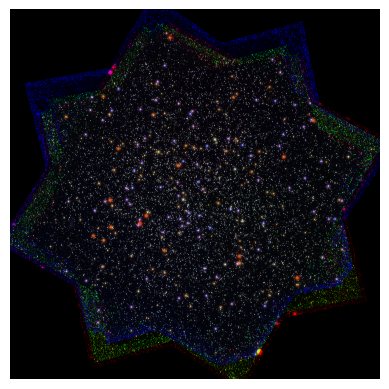

In [1]:
import numpy as np
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2 as cv

#image_list = ["ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f275w_v1_stack-0940s.fits", "ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f336w_v1_stack-0415s.fits", "ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f438w_v1_stack-0165s.fits", "ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f606w_v1_stack-0370s.fits", "ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f814w_v1_stack-0340s.fits"]
image_list = ["ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f275w_v1_stack-0940s.fits", "ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f336w_v1_stack-0415s.fits","ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f438w_v1_stack-0165s.fits"]

images = [fits.getdata(file) for file in image_list]

norm_images = [img[2000:8000, 2000:8000]/ np.percentile(img[2000:8000, 2000:8000], 99) for img in images]

filtered_images = [gaussian_filter(img, sigma=1) for img in norm_images]

rgb_image = make_lupton_rgb(filtered_images[2], filtered_images[1], filtered_images[0], stretch=1, Q=1)


plt.imshow(rgb_image, origin='lower')
plt.axis('off')
plt.savefig('ngc6101.png')
'''
p0, p100 = np.percentile(rgb_image, (0, 100))
rgb_image = np.clip((rgb_image - p0) / (p100 - p0), 0, 1)
rgb_image = np.flipud(rgb_image)
rgb_image_8bit = (rgb_image*255).astype(np.uint8)
rgb_image_bgr = cv.cvtColor(rgb_image_8bit, cv.COLOR_RGB2BGR)
cv.imwrite('ngc6101.png', rgb_image_bgr)
'''

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2 as cv

# Load the FITS files
image_list = ["ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f275w_v1_stack-0940s.fits", 
              "ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f336w_v1_stack-0415s.fits", 
              "ngc6101/hlsp_hugs_hst_wfc3-uvis_ngc6101_f438w_v1_stack-0165s.fits", 
              "ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f606w_v1_stack-0370s.fits",
              "ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f606w_v1_stack-0035s.fits",
              "ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f814w_v1_stack-0340s.fits",
              "ngc6101/hlsp_hugs_hst_acs-wfc_ngc6101_f814w_v1_stack-0035s.fits"]

images = [fits.getdata(image) for image in image_list]
norm_images = [img[2000:8000, 2000:8000] / np.percentile(img[2000:8000, 2000:8000], 99) for img in images]

R = norm_images[5] * 0.7 + norm_images[6] * 0.3
G = norm_images[3] * 0.7 + norm_images[4] * 0.3 
B = norm_images[2] * 0.5 + norm_images[1] * 0.25 + norm_images[0] * 0.25

rgb_image = np.stack([B, G, R], axis=-1)

rgb_image = gaussian_filter(rgb_image, sigma=1)

rgb_image = np.clip(rgb_image, 0, 1)

rgb_image_8bit = (rgb_image * 255).astype(np.uint8)

cv.imwrite('ngcg6101_fullstack.png', rgb_image_8bit)
 

True

In [8]:
#USING LUPTON SCHEME
from astropy.visualization import make_lupton_rgb

rgb_image = make_lupton_rgb(R, G, B, stretch=0.1, Q=1)
p0, p100 = np.percentile(rgb_image, (0, 100))
rgb_image = np.clip((rgb_image - p0) / (p100 - p0), 0, 1)
rgb_image = np.flipud(rgb_image)
rgb_image_8bit = (rgb_image*255).astype(np.uint8)
rgb_image_bgr = cv.cvtColor(rgb_image_8bit, cv.COLOR_RGB2BGR)
cv.imwrite('ngc6101_fullstack_lupton.png', rgb_image_bgr)

True